# Simulated Annealing for the Shubert 3 Function

Written by Phyllis Poh (hlpp2), for 4M17 Practical Optimisation, Coursework 2

# Importing Libraries

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set the random number generator seed
np.random.seed(0)

# Shubert Functions and Visualisation

For reference, documentation for the Shubert 3 function: http://benchmarkfcns.xyz/benchmarkfcns/shubert3fcn.html?fbclid=IwAR2SjVB0XUwaCTgMZ3GWFlcyTX1OACIn1kLZMgRWSLSA0L21NcVjtWDwUlQ

Shubert 3 function: $f(\mathbf{x})=f(x_1, ...,x_n)=\sum_{i=1}^{n}{\sum_{j=1}^5{j \sin \left((j+1)x_i+j \right)}}$

Global minima for the 2D Shubert 3 funnction: $f(\mathbf{x}^\ast) = −29.6733337$ 

In [3]:
def shubert(x):
    for element in x:
        assert abs(element) <= 2
        
    y = 0
    for i in range(5):
        for j in range(1,6):
            y += j * math.sin((j+1)*x[i] + j)
    return y


def shubert2d(x):
    for element in x:
        #print(element)
        assert abs(element) <= 2
    y = 0
    for i in range(2):
        for j in range(1,6):
            y += j * math.sin((j+1)*x[i] + j)
    return y
        
    
def plot_shubert2d(archive=[], path=[]):
    xvalues = np.linspace(-2,2,200)
    yvalues = np.linspace(-2,2,200)
    xgrid, ygrid = np.meshgrid(xvalues, yvalues)
    zvalues = []

    for x in range(len(xvalues)):
        zvalues.append([])
        for y in range(len(yvalues)):
            zvalues[x].append(shubert2d([xvalues[x],yvalues[y]]))

    zvalues = np.array(zvalues)
    
    x_points = []
    y_points = []
    z_points = []
    x_path = []
    y_path = []
    z_path = []
    
    for entry in archive:
        x_points.append(archive[entry][0])
        y_points.append(archive[entry][1])
        z_points.append(entry)
        
    for entry in path:
        x_path.append(path[entry][0])
        y_path.append(path[entry][1])
        z_path.append(entry)
        
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1,projection='3d')
    surf = ax.plot_surface(xgrid, ygrid, zvalues, rstride=5, cstride=5, linewidth=0, cmap=cm.plasma)
    ax.set_title('Surface Plot of 2D Shubert 3 Function', fontsize=18)
    ax.set_xlabel('$x_1$', fontsize=18)
    ax.set_ylabel('$x_2$', fontsize=18)
    ax.set_zlabel('$f(\mathbf{x})$', fontsize=18)
    ax.scatter(x_points, y_points, z_points)
    plt.tight_layout()

    fig2 = plt.figure(figsize=(8,6))
    ax = fig2.add_subplot(1,1,1)
    plt.contour(xgrid, ygrid, zvalues, 20, cmap=cm.plasma)    
    ax.scatter(x_points, y_points)
    if archive != []:
        ax.set_title('Archived Solutions for 2D Shubert 3 Problem', fontsize=18)
    else:
        ax.set_title('Contour Plot of 2D Shubert 3 Function', fontsize=18)
    ax.set_xlabel('$x_1$', fontsize=18)
    ax.set_ylabel('$x_2$', fontsize=18)
    cbar = fig2.colorbar(surf, aspect=18)
    cbar.set_label('$f(\mathbf{x})$', rotation=0, fontsize=18)
    
    z = [min(i) for i in zvalues]
    
    if path != []:
        fig3 = plt.figure(figsize=(8,6))
        ax = fig3.add_subplot(1,1,1)
        plt.contour(xgrid, ygrid, zvalues, 20, cmap=cm.plasma)    
        ax.scatter(x_path, y_path)
        ax.set_title('Simulated Annealing Search Pattern for 2D Shubert 3 Problem', fontsize=18)
        ax.set_xlabel('$x_1$', fontsize=18)
        ax.set_ylabel('$x_2$', fontsize=18)
        cbar = fig3.colorbar(surf, aspect=18)
        cbar.set_label('$f(\mathbf{x})$', rotation=0, fontsize=18)
        
        fig4 = plt.figure(figsize=(8,6))
        ax = fig4.add_subplot(1, 1, 1)
        plt.plot(z_path)
        plt.xlabel('Iteration', Fontsize=14)
        plt.ylabel('$f(\mathbf{x})$', Fontsize=14)
        plt.title('Objective Reduction for Minimization of 2D Shubert', Fontsize=14)

    
def plot_progress(fx_progress):
    '''Plot the progress of best solution found across number of iterations'''
    plt.figure()
    plt.plot(fx_progress)
    plt.xlabel('Number of Objective Evaluations', Fontsize=14)
    plt.ylabel('$f(\mathbf{x^*})$', Fontsize=14)
    plt.title('Best Solution Found Across Iterations', Fontsize=14)
    
    
def plot_progress2d(fx_progress):
    '''Plot the progress of best solution found across number of iterations
    Compares with global minimum for 2D Shubert function
    '''
    plt.figure()
    plt.plot(fx_progress, label='Simulated Annealing')
    plt.xlabel('Number of Objective Evaluations', Fontsize=14)
    plt.ylabel('$f(\mathbf{x^*})$', Fontsize=14)
    plt.title('Best Solution Found Across Iterations', Fontsize=14)
    plt.plot(np.ones(len(fx_progress))*-29.6733337, '--', label='Global Minimum')
    plt.legend()

    
def plot_progress_multseed(fx_progress_list, title=None):
    '''Plot the progress of best solution found across number of iterations'''
    plt.figure()
    for seed in range(len(fx_progress_list)):
        plt.plot(fx_progress_list[seed], label=seed)
    plt.xlabel('Number of Objective Evaluations', Fontsize=14)
    plt.ylabel('$f(\mathbf{x^*})$', Fontsize=14)
    if title == None:
        plt.title('Best Solution Found Across Iterations for Various Seeds', Fontsize=14)
    else:
        plt.title(title, Fontsize=14)


# Visualisation of 2D Shubert 3 Function

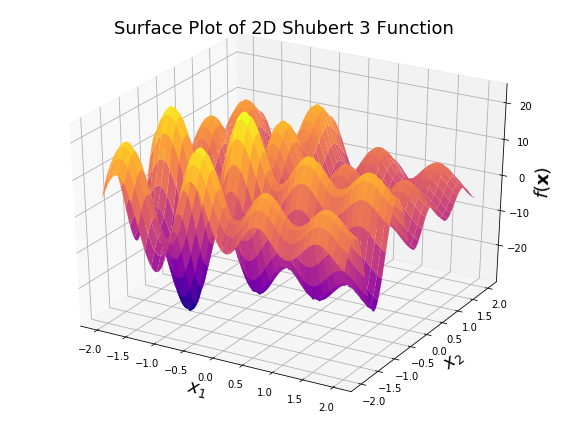

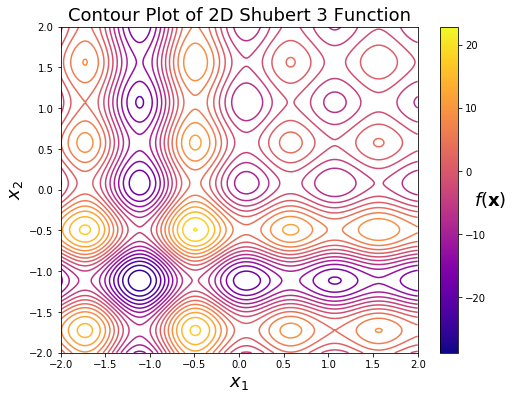

In [10]:
plot_shubert2d()

# General Functions
Functions related to initialisation and archiving

In [4]:
def shotgun_init(f, n):
    '''Shotgun Initialisation (5D)'''
    best_x = np.zeros(5)
    for i in range(n):
        x = np.zeros(len(best_x))
        for j in range(len(x)):
            x[j] = np.random.uniform(-2, 2)
        if f(x) <= f(best_x):
            best_x = x
    return best_x


def shotgun_init2d(f, n):
    '''Shotgun Initialisation (2D)'''
    best_x = np.zeros(2)
    for i in range(n):
        x = np.zeros(len(best_x))
        for j in range(len(x)):
            x[j] = np.random.uniform(-2, 2)
        if f(x) <= f(best_x):
            best_x = x
    return best_x


def update_archive(x, f, archive):
    '''Archives the best solution'''
    for fx0 in archive:
        if f(x) < fx0:
            del archive[fx0]
            archive[f(x)] = x
            break
    return archive


def feasible_check(x):
    for element in x:
        if abs(element) > 2:
            return False
    return True

# Simulated Annealing Functions
Functions related to simulated annealing

In [5]:
def temp_init(f, x0):
    """Temperature Initialisation. T0 = sigma0"""
    f_list = []
    for i in range(100):
        new_x = rand_step(x0)
        f_list.append(f(new_x))
    T0 = np.std(f_list)
    return T0


def rand_step(x0, delta=0.5):
    '''Taking a random step from point x0'''
    x = np.zeros(len(x0))
    for i in range(len(x0)):
        element = x0[i] + np.random.uniform(-delta, delta)
        while abs(element) > 2:
            element = x0[i] + np.random.uniform(-delta, delta)
        x[i] = element
    return x

# Simulated Annealing Main Function (Shubert 2D)


Best solution: 
 -29.635987436523635 [-1.10203049 -1.12325504]


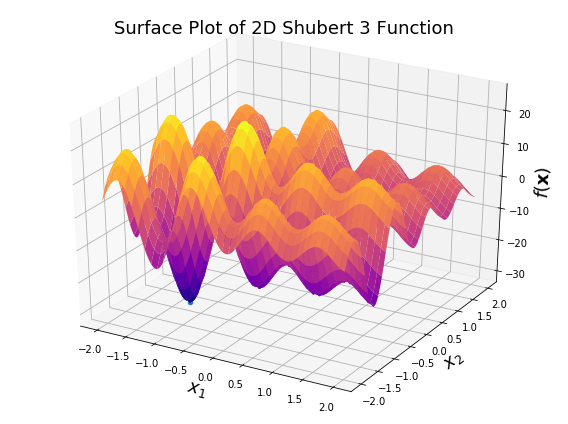

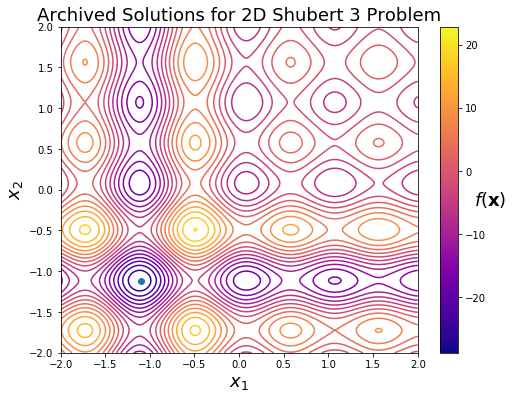

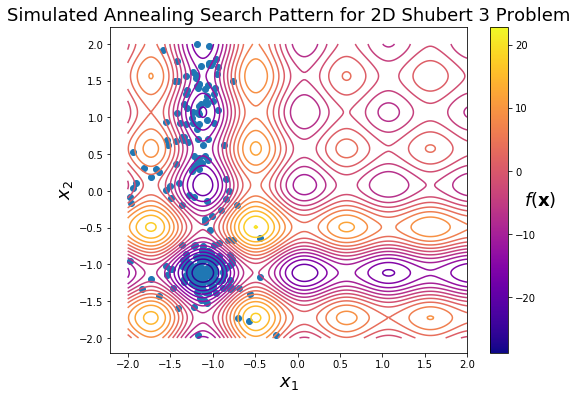

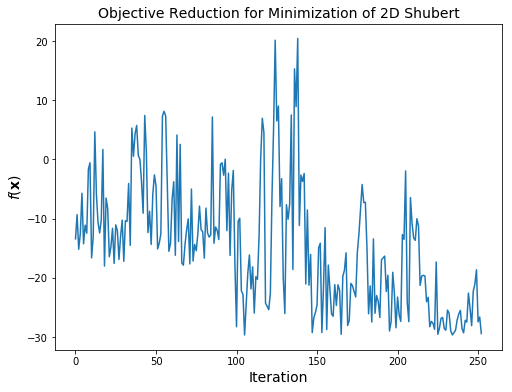

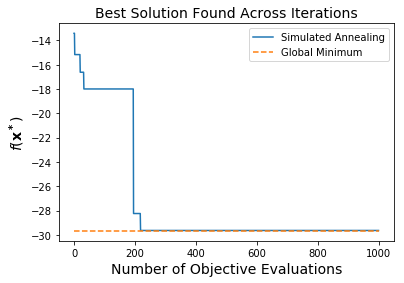

In [13]:
'''Initial implementation of simulated annealing on the 2D version of the problem.
Used to ensure that implementation is working correctly, and for better visualisation of how the method works.
'''
f = shubert2d

x0 = shotgun_init2d(f, 20)
T0 = temp_init(f, x0)

fx_progress = []
x_old = x0.copy()
path = {f(x0):x0.copy()}
T = T0

archive = {f(x0):x0}  
old_archive = {f(x0):x0}  

obj_eval_num = 0

while obj_eval_num < 1000:
    counter = 0
    for j in range(40):  
        obj_eval_num += 1
        x_new = rand_step(x_old)
        df = f(x_new) - f(x_old)
        
        # Roll and accept with probability following simulated annealing rules
        if df < 0: 
            accept = True
        else:
            p = math.exp(-df/T)
            accept = np.random.uniform(0, 1) < p
            
        # Restarting in the event that the SA serach 
        # cannot find an acceptable solution to be archived    
        if counter > 50: 
            counter = 0
            x_new = archive[min([i for i in archive])]
            fx_progress.append(min([i for i in archive]))
            break
            
        if accept:
            accept = False 
            counter = 0
            old_archive = archive.copy()
            archive = update_archive(x_new, f, archive)
            path[f(x_new)] = x_new.copy()
            x_old = x_new.copy()
            
        if min([i for i in archive]) == min([i for i in old_archive]):
            counter += 1
            
        fx_progress.append(min([i for i in archive]))

    T *= 0.95

    
best_sln = min([i for i in archive])
print("\nBest solution: \n", best_sln, archive[best_sln])  

# Draw contour plot and evolution of best solution found across iterations
plot_shubert2d(archive, path)
plot_progress2d(fx_progress)

# Simulated Annealing Main Function (Shubert 2D, Varying Random Seeds)

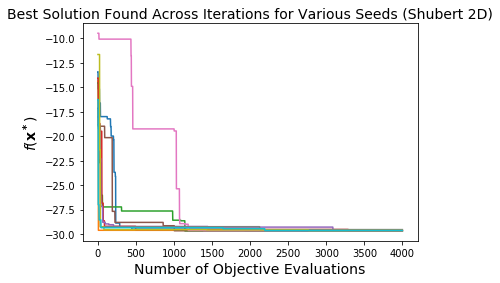

In [14]:
f = shubert2d
fx_progress_list = []

for seed in range(10):
    np.random.seed(seed)
    x0 = shotgun_init2d(f, 20)
    T0 = temp_init(f, x0)

    x_old = x0.copy()
    T = T0
    archive = {f(x0):x0}  
    old_archive = archive.copy()

    fx_progress = []
    obj_eval_num = 0

    while obj_eval_num < 4000:
        counter = 0
        for j in range(400):  
            obj_eval_num += 1
            x_new = rand_step(x_old)
            df = f(x_new) - f(x_old)

            # Roll and accept with probability following simulated annealing rules
            if df < 0: 
                accept = True
            else:
                p = math.exp(-df/T)
                accept = np.random.uniform(0, 1) < p

            if min([i for i in archive]) == min([i for i in old_archive]):
                counter += 1

            # Restarting in the event that the SA serach 
            # cannot find an acceptable solution to be archived    
            if counter > 50:    
                x_new = archive[min([i for i in archive])]
                fx_progress.append(min([i for i in archive]))
                break

            if accept:
                accept = False 
                counter = 0
                old_archive = archive.copy()
                archive = update_archive(x_new, f, archive)
                path[f(x_new)] = x_new.copy()
                x_old = x_new.copy()


            fx_progress.append(min([i for i in archive]))

        T *= 0.95
    fx_progress_list.append(fx_progress)
        
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for Various Seeds (Shubert 2D)')

# Simulated Annealing Main Function (Shubert 5D)

Average best solution: -62.46608490690288
Best solution found: -70.32175776618753


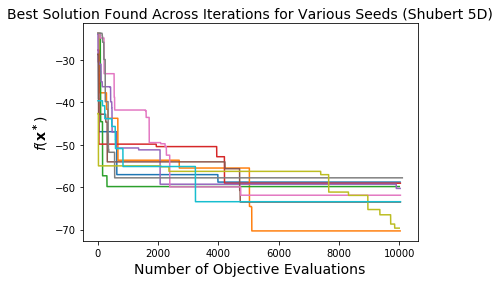

In [15]:
def sim_ann(alpha=0.95, Lmin=400, delta=0.5):
    '''Implementation of simulated annealing to solve the 5D Shubert 3 Function
    Parameters are used for investigation below.
    '''
    f = shubert
    fx_progress_list = []

    for seed in range(10):
        np.random.seed(seed)
        x0 = shotgun_init(f, 20)
        T0 = temp_init(f, x0)

        x_old = x0.copy()
        T = T0
        archive = {f(x0):x0}  
        old_archive = archive.copy()

        fx_progress = []
        obj_eval_num = 0

        while obj_eval_num < 10000:
            counter = 0
            for j in range(Lmin):  
                obj_eval_num += 1
                counter += 1
                x_new = rand_step(x_old, delta)
                df = f(x_new) - f(x_old)

                # Roll and accept with probability following simulated annealing rules
                if df < 0: 
                    accept = True
                else:
                    p = math.exp(-df/T)
                    accept = np.random.uniform(0, 1) < p

                # Restarting in the event that the SA serach 
                # cannot find an acceptable solution to be archived    
                if counter > 50:    
                    x_new = archive[min([i for i in archive])]
                    fx_progress.append(min([i for i in archive]))
                    break

                if accept:
                    accept = False 
                    counter = 0
                    archive = update_archive(x_new, f, archive)
                    x_old = x_new.copy()

                fx_progress.append(min([i for i in archive]))

            T *= alpha
        fx_progress_list.append(fx_progress)  
    return fx_progress_list

fx_progress_list = sim_ann()
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for Various Seeds (Shubert 5D)')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

# Performance Investigations
## Performance Measure
Best solution after 10,000 objective function evaluations made, averaged across 10 random seeds


## Possible Parameters To Vary:
### Random Step
Generation of new trial solutions

### Annealing Schedule
Initial Temperature $T_0$ 

Length for Markov chains 

Rule for decrementing temperature

## Investigation 1: Temperature Annealing

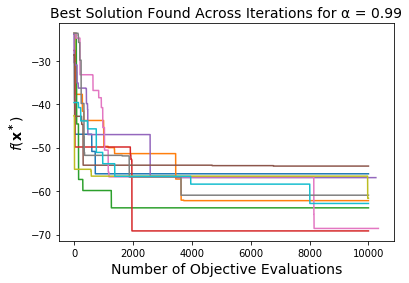

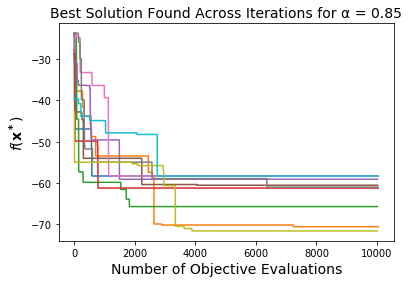

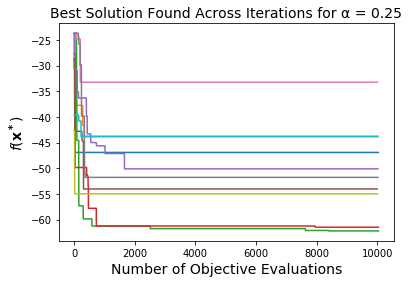

In [16]:
fx_progress_list = sim_ann(alpha=0.99)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for α = 0.99')  

fx_progress_list = sim_ann(alpha=0.85)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for α = 0.85')

fx_progress_list = sim_ann(alpha=0.25)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for α = 0.25')

In [17]:
alpha_var = np.linspace(0.2, 0.99, 100)
y_scatter = []
best_x_avg = []

for alpha in alpha_var:
    fx_progress_list = sim_ann(alpha=alpha)
    progress_list = [arr[-1] for arr in fx_progress_list]
    avg = np.average(progress_list)
    best_x_avg.append(avg)
    y_scatter += progress_list

Average best solution: -61.63264406889044
Best solution found: -69.14783092714397


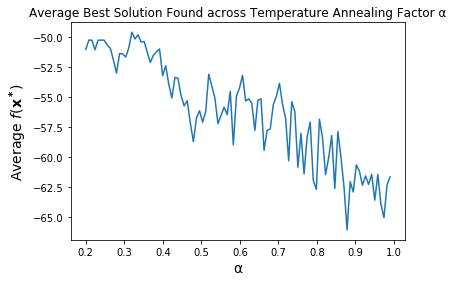

In [18]:
plt.plot(alpha_var, best_x_avg)
plt.xlabel('α', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Average Best Solution Found across Temperature Annealing Factor α')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

Text(0.5, 1.0, 'Best Solutions Found across Temperature Annealing Factor α with Varying Random Seeds')

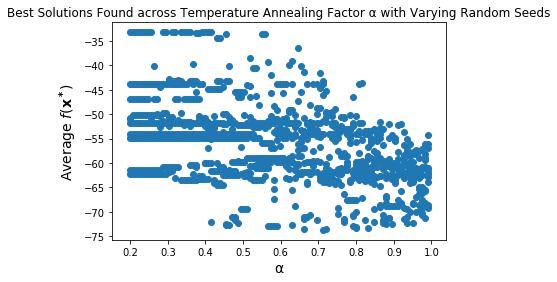

In [19]:
x_scatter = []
for alpha in alpha_var:
    for iter in range(10):
        x_scatter.append(alpha)

plt.scatter(x_scatter, y_scatter)
plt.xlabel('α', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Best Solutions Found across Temperature Annealing Factor α with Varying Random Seeds')

# Investigation 2: Length of Markov chains

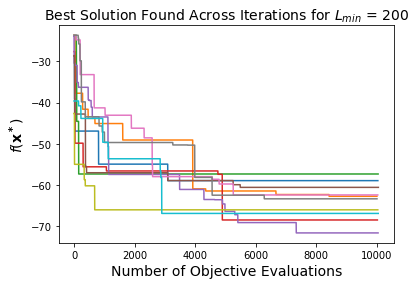

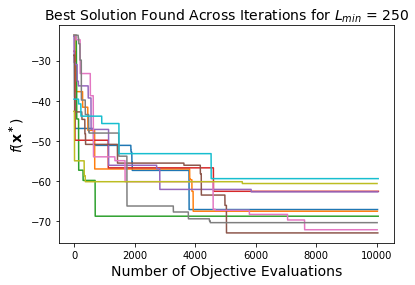

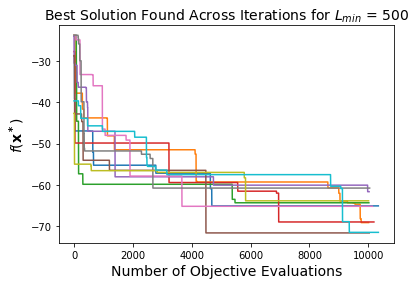

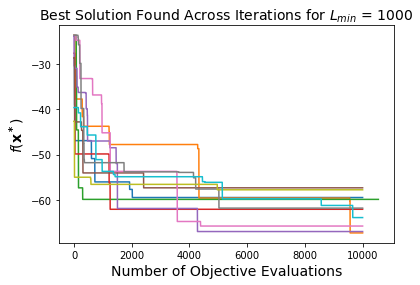

In [20]:
fx_progress_list = sim_ann(Lmin=200)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $L_{min}$ = 200')  

fx_progress_list = sim_ann(Lmin=250)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $L_{min}$ = 250')  

fx_progress_list = sim_ann(Lmin=500)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $L_{min}$ = 500')

fx_progress_list = sim_ann(Lmin=1000)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $L_{min}$ = 1000')

In [21]:
lmin_var = np.linspace(100, 1000, 100, dtype=int)
best_x_avg = []

for lmin in lmin_var:
    fx_progress_list = sim_ann(Lmin=lmin)
    progress_list = [arr[-1] for arr in fx_progress_list]
    avg = np.average(progress_list)
    best_x_avg.append(avg)

Average best solution: -62.19956277689407
Best solution found: -67.24982079670599


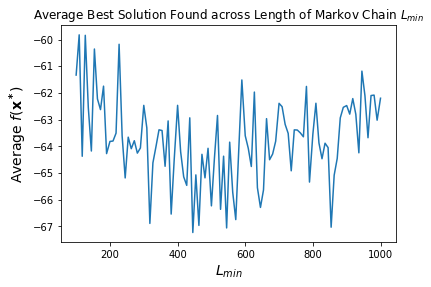

In [22]:
plt.plot(lmin_var, best_x_avg)
plt.xlabel('$L_{min}$', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Average Best Solution Found across Length of Markov Chain $L_{min}$')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

## Investigation 3: Random Solution Generation

### Investigation 3a: Distribution of Random Step

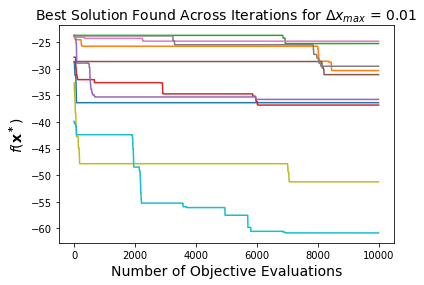

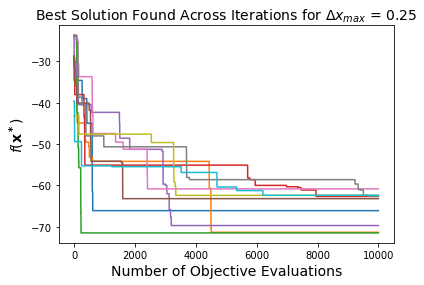

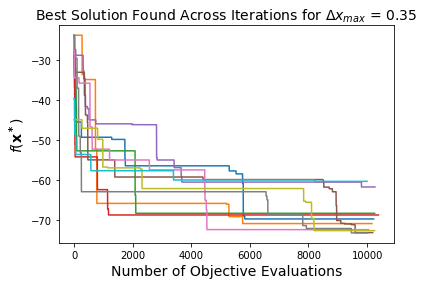

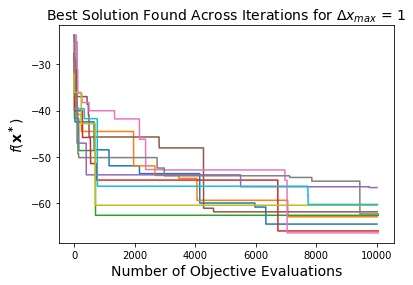

In [42]:
fx_progress_list = sim_ann(delta=0.01)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $\Delta x_{max}$ = 0.01')

fx_progress_list = sim_ann(delta=0.25)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $\Delta x_{max}$ = 0.25')

fx_progress_list = sim_ann(delta=0.35)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $\Delta x_{max}$ = 0.35') 

fx_progress_list = sim_ann(delta=1)
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for $\Delta x_{max}$ = 1')

In [24]:
delta_var = np.linspace(0.01, 2, 100)
best_x_avg = []

for delta in delta_var:
    fx_progress_list = sim_ann(delta=delta)
    progress_list = [arr[-1] for arr in fx_progress_list]
    avg = np.average(progress_list)
    best_x_avg.append(avg)
    #y_scatter += progress_list

Average best solution: -59.18286365598046
Best solution found: -64.23484629429973


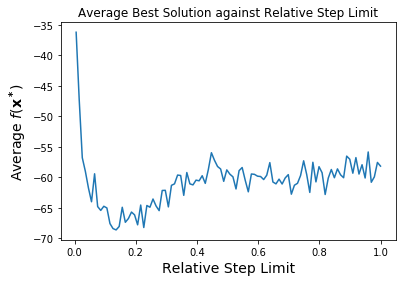

In [30]:
x_step_plot = [element/2 for element in delta_var]
plt.plot(x_step_plot, best_x_avg)
plt.xlabel('Relative Step Limit', Fontsize=14)
plt.ylabel('Average $f(\mathbf{x^*})$', Fontsize=14)
plt.title('Average Best Solution against Relative Step Limit')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min([arr[-1] for arr in fx_progress_list]))

### Investigation 3b: Parks Random Step

In [26]:
def parks_rand_step(x_old, D):
    alpha = 0.1
    omega = 2.1
    
    dim = len(x_old)
    x_new = np.ones(dim)*3
    u = np.zeros(dim)
    R = np.zeros((dim, dim))
    
    while not feasible_check(x_new):
        D_new = (1 - alpha) * D
        for i in range(dim):
            u[i] = np.random.uniform(-1, 1)
            R[i, i] = abs(D[i, i] * u[i])
        D_new += alpha * omega * R
        x_new = x_old + D.dot(u)
    
    return x_new, D_new, R


In [27]:
f = shubert
fx_progress_list = []

for seed in range(10):
    np.random.seed(seed)
    x0 = shotgun_init(f, 20)
    T0 = temp_init(f, x0)
    D = np.eye(len(x0))

    x_old = x0.copy()
    T = T0
    archive = {f(x0):x0}  

    fx_progress = []
    obj_eval_num = 0

    while obj_eval_num < 10000:
        counter = 0
        for j in range(400):  
            obj_eval_num += 1
            counter += 1
            x_new, D, R = parks_rand_step(x_old, D)
            df = f(x_new) - f(x_old)

            # Roll and accept with probability following simulated annealing rules
            if df < 0: 
                accept = True
            else:
                d_bar = 0
                for i in range(len(x0)):
                    d_bar += R[i,i]**2
                d_bar = math.sqrt(d_bar)
                p = math.exp(-df/T/d_bar)
                accept = np.random.uniform(0, 1) < p

            # Restarting in the event that the SA serach 
            # cannot find an acceptable solution to be archived    
            if counter > 50:    
                x_new = archive[min([i for i in archive])]
                fx_progress.append(min([i for i in archive]))
                break

            if accept:
                accept = False 
                counter = 0
                archive = update_archive(x_new, f, archive)
                x_old = x_new.copy()

            fx_progress.append(min([i for i in archive]))
            if obj_eval_num >= 10000:
                    break

        T *= 0.95
    fx_progress_list.append(fx_progress)  

Average best solution: -59.18286365598046
Best solution found: -64.23484629429973


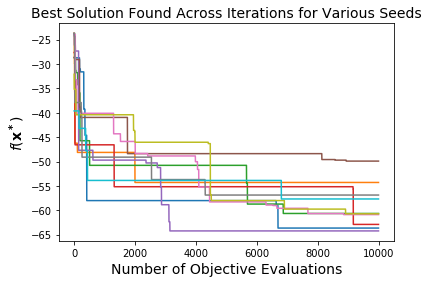

In [28]:
plot_progress_multseed(fx_progress_list, 'Best Solution Found Across Iterations for Various Seeds')
print("Average best solution:", np.average([arr[-1] for arr in fx_progress_list]))
print("Best solution found:", np.min(fx_progress_list))

# Best Solution

Best solution: [-1.10278485 -1.15678712 -1.07902047 -1.12477715 -1.11047461] at: -73.61694830065696


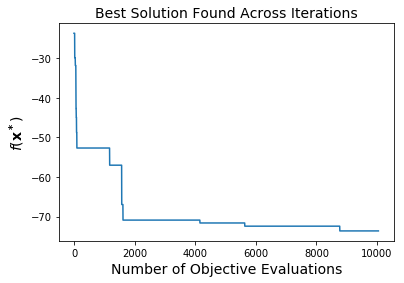

In [7]:
f = shubert
alpha=0.9
Lmin=400
delta=0.35

np.random.seed(2)
x0 = shotgun_init(f, 20)
T0 = temp_init(f, x0)

x_old = x0.copy()
T = T0
archive = {f(x0):x0}  
old_archive = archive.copy()

fx_progress = []
obj_eval_num = 0

while obj_eval_num < 10000:
    counter = 0
    for j in range(Lmin):  
        obj_eval_num += 1
        counter += 1
        x_new = rand_step(x_old, delta)
        df = f(x_new) - f(x_old)

        # Roll and accept with probability following simulated annealing rules
        if df < 0: 
            accept = True
        else:
            p = math.exp(-df/T)
            accept = np.random.uniform(0, 1) < p

        # Restarting in the event that the SA serach 
        # cannot find an acceptable solution to be archived    
        if counter > 50:    
            x_new = archive[min([i for i in archive])]
            fx_progress.append(min([i for i in archive]))
            break

        if accept:
            accept = False 
            counter = 0
            archive = update_archive(x_new, f, archive)
            x_old = x_new.copy()

        fx_progress.append(min([i for i in archive]))

    T *= alpha

plot_progress(fx_progress)
print('Best solution:', x_new, 'at:', fx_progress[-1])

# Archived Code
Code that was initially implemented, but archived due to lack of relevance to our investigation

In [29]:
def update_archive_old(x, f, archive):
    """Update Archive. Best L Dissimilar Solutions"""
    L = 10
    dmin = 1
    dsim = 1
    to_archive = False
    to_delete = []
    is_dissimilar = dissimilar_check(x, archive, dmin)
    is_best = best_check(x, f, archive)
    
    if len(archive) < L:
        # Archive if less than 10 solutions and dissimilar to all of them
        if is_dissimilar:
            to_archive = True
            
    elif is_best:
        # Archive if best solution found so far
        for obj in archive:
            if np.linalg.norm(x - archive[obj]) <= dmin:
                to_archive = True
                to_delete.append(obj)
        if not to_archive:
            to_archive = True
            to_delete.append(max([i for i in archive]))
        
    elif is_dissimilar:
        # Archive if dissimilar to all solutions and better than worst of these
        if f(x) < max([i for i in archive]):
            to_archive = True
            to_delete.append(max([i for i in archive]))
        
    else:
        # Archive if similar to solution and better than it
        for obj in archive:
            if np.linalg.norm(x - archive[obj]) <= dsim and f(x) < obj:
                to_archive = True
                to_delete.append(obj)

    # Delete entries from archive
    for entry in to_delete:
        del archive[entry]
                
    # Add to archive
    if to_archive:
        archive[f(x)] = x
    
    return archive


def dissimilar_check(x, archive, dmin):
    '''Check if x is dissimilar to all entries in archive'''
    for obj in archive:
        if np.linalg.norm(x - archive[obj]) <= dmin:
            return False
    return True 


def best_check(x, f, archive):
    '''Check if f(x) is better than all entries in archive'''
    for obj in archive:
        if f(x) > obj:
            return False
    return True